In [1]:
## Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#access lexical resources (i.e.,stopwords)
from nltk.corpus import stopwords 
#The following classes from the Scikit-learn library are used for text vectorization. CountVectorizer converts text data into a matrix of token counts, while TfidfTransformer calculates the TF-IDF (Term Frequency-Inverse Document Frequency) values for the tokens.
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
#provides a collection of string constants for punctuation characters
import string, nltk
#tokenizes sentences into words,
from nltk import word_tokenize 
# PorterStemmer and WordNetLemmatizer are used for stemming and lemmatization, respectively, to reduce words to their root form.
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
#downloads the WordNet lexical database
nltk.download('wordnet') 

C:\Users\100641313\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\100641313\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\100641313\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\100641313\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\100641313\AppData\Roaming\nltk_data...


True

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\100641313\AppData\Roaming\nltk_data...


True

In [4]:
# load the reviews dataset
review = pd.read_csv('reviews.csv')
review.tail(10)

,category,rating,label,text_
40422,Clothing_Shoes_and_Jewelry_5,4.0,CG,I wore this from 4pm to 9pm and it was perfect...
40423,Clothing_Shoes_and_Jewelry_5,4.0,OR,This is a classy looking watch. I don't get m...
40424,Clothing_Shoes_and_Jewelry_5,3.0,CG,I kind of feel giving it a 3 star because it's...
40425,Clothing_Shoes_and_Jewelry_5,5.0,OR,The stated dimensions on the description are o...
40426,Clothing_Shoes_and_Jewelry_5,5.0,CG,"Overall, I love this hat!\n\nSize/Color: 9.5/..."
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...


In [6]:
review.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [7]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


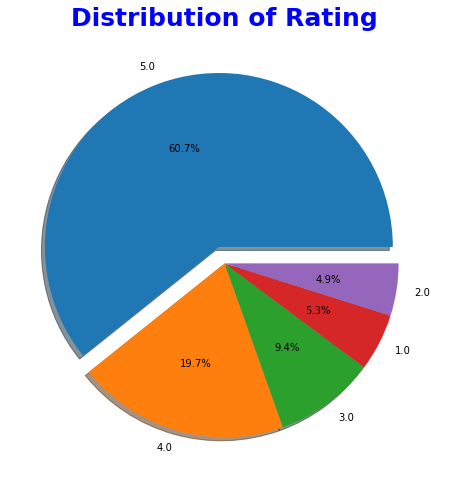

In [8]:
#plot the distribution of rating
plt.figure(figsize=(15,8))
labels = review['rating'].value_counts().keys()
values = review['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Distribution of Rating',fontweight='bold',fontsize=25,pad=20,color='blue')
plt.show()

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\100641313\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    #print(nopunc)
    nopunc = ''.join(nopunc)
    #print(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

review['text_'][0], clean_text(review['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [17]:
review['text_'] = review['text_'].apply(clean_text)

In [19]:
review['text_'] = review['text_'].astype(str)

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\100641313\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [26]:
preprocess(review['text_'][0])

'Love Well made sturdy comfortable love itVery pretty'

In [27]:
review['text_'] = review['text_'].apply(preprocess)

In [ ]:
review['text_'] = review['text_'].str.lower()

# stemming process is applied to the 'text_' column of 'review' dataframe

In [28]:
# An instance of the PorterStemmer class from the NLTK library is created. 
#The Porter stemming algorithm is commonly used for stemming words, reducing them to their root form.
stemmer = PorterStemmer()
#This defines a function named 'stem_words' that takes a text input as a parameter.
def stem_words(text):
    #Inside the 'stem_words' function, the input text is split into individual words using the .split() method. 
    #For each word in the split text, the Porter stemmer is applied using stemmer.stem(word). 
    #The stemmed words are then joined back together using ' '.join(...), forming a string of stemmed words.
    return ' '.join([stemmer.stem(word) for word in text.split()])
#This line applies the 'stem_words' function to the 'text_' column of the DataFrame 'review'. 
#The .apply() method iterates through each value in the column, passing it to the 'stem_words' function, and assigns the stemmed text back to the 'text_' column.
review['text_'] = review['text_'].apply(lambda x: stem_words(x))

In [29]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
review["text_"] = review["text_"].apply(lambda text: lemmatize_words(text))

In [30]:
review['text_'].head()

0    love well made sturdi comfort love itveri pretti
1        love great upgrad origin ive mine coupl year
2              pillow save back love look feel pillow
3                 miss inform use great product price
4                 nice set good qualiti set two month
Name: text_, dtype: object

In [32]:
review.to_csv('Preprocessed.csv')